In [7]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
weights = np.load('/fastio2/dasha/double_pulse/weights.npy', mmap_mode='r+')

In [115]:
data = np.load('/fastio2/dasha/double_pulse/data.npy', mmap_mode='r')

In [116]:
if_df = pd.read_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_INFO_FULL_withPred.pkl")

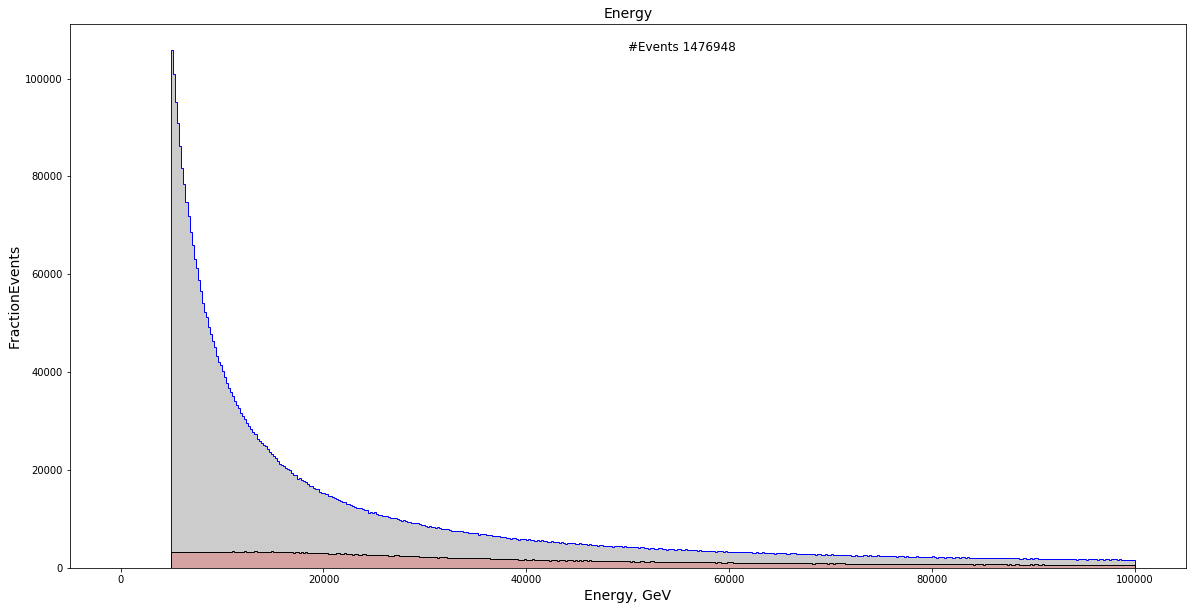

In [117]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#weights = np.ones(sz)/sz
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, GeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(weights['energy'], bins =500, histtype = 'step',edgecolor ='b', lw =1, fill=True, fc=(0, 0, 0, 0.2), range = [0,100000], label = "Weights")  
ax.hist(data['neutrino']['energy'], bins =500, histtype = 'step',edgecolor ='k', lw =1, fill=True, fc=(1, 0, 0, 0.2), range = [0,100000], label = "Data")  
#ax.hist(data['meson']['energy'], bins =100, histtype = 'step',edgecolor ='r', lw =1, fill=True, fc=(1, 0, 0, 0.2), range = [0,1000000], label = "Tau")  
plt.show()

In [9]:
passed = weights['keys']['passed'] ==1
header = weights['keys']['header'] ==1
raw_data = weights['keys']['raw_data'] ==1
weight = weights['keys']['weights'] ==1
mctree = weights['keys']['mctree'] ==1
cvstats = weights['keys']['cvstats'] ==1
pulses = weights['keys']['pulses'] ==1

In [10]:
len_pas=len(weights[passed])
len_header = len(weights[header])
len_raw_data = len(weights[raw_data])
len_weight = len(weights[weight])
len_mctree = len(weights[mctree])
len_cvstats = len(weights[cvstats])
len_pulses = len(weights[pulses])

In [13]:
D= {"all":len_pas/len(weights), "header":len_header/len(weights), "raw_data":len_raw_data/len(weights), "weights":len_weight/len(weights), "mctree":len_mctree/len(weights),"cv_stats":len_cvstats/len(weights),"pulses":len_pulses/len(weights)}

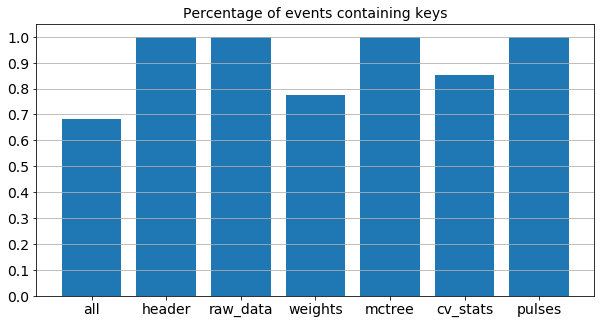

In [27]:
fig = plt.figure(figsize=(10, 5))
plt.title('Percentage of events containing keys', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()),fontsize=14)
plt.yticks([x*0.1 for x in range(11)],fontsize=14,)
plt.grid(axis='y', which = 'both')
plt.show()

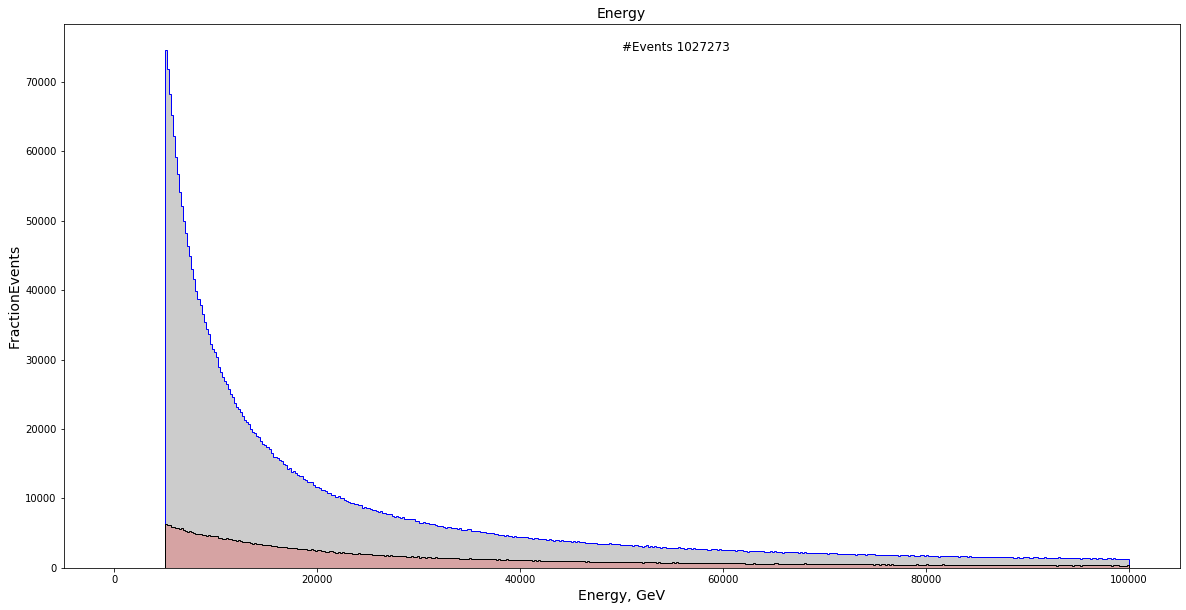

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#weights = np.ones(sz)/sz
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, GeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(weights[weight]['energy'], bins =500, histtype = 'step',edgecolor ='b', lw =1, fill=True, fc=(0, 0, 0, 0.2), range = [0,100000], label = "Weights")  
ax.hist(data['neutrino']['energy'], bins =500, histtype = 'step',edgecolor ='k', lw =1, fill=True, fc=(1, 0, 0, 0.2), range = [0,100000], label = "Data")  
#ax.hist(data['meson']['energy'], bins =100, histtype = 'step',edgecolor ='r', lw =1, fill=True, fc=(1, 0, 0, 0.2), range = [0,1000000], label = "Tau")  
plt.show()

In [121]:
wset = set()
for i in weights['id'].tolist():
    wset.add(i[0])

In [122]:
dset = set()
for i in data['id'].tolist():
    dset.add(i[0])

In [123]:
oset = set(if_df['id'])

In [124]:
print(len(wset), len(dset), len(oset))

6374299 1476948 909096


In [125]:
print(len(wset.intersection(dset)))
print(len(wset.intersection(oset)))

1476948
909096


In [126]:
xset = oset.intersection(dset)
print(len(xset))

905999


In [84]:
xset_energy= []
for i in weights.tolist():
    #print(i[0][0], type(i[0][0]))
    if i[0][0] in xset:
        xset_energy.append(i[0][1])

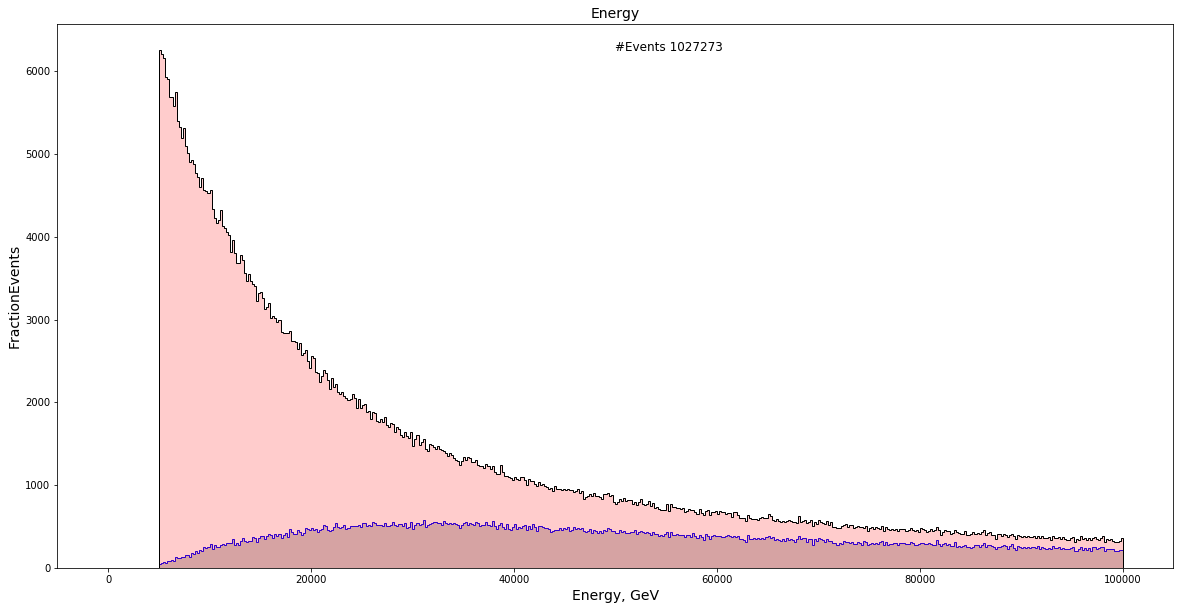

In [86]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#weights = np.ones(sz)/sz
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, GeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(xset_energy, bins =500, histtype = 'step',edgecolor ='b', lw =1, fill=True, fc=(0, 0, 0, 0.2), range = [0,100000], label = "Weights")  
ax.hist(data['neutrino']['energy'], bins =500, histtype = 'step',edgecolor ='k', lw =1, fill=True, fc=(1, 0, 0, 0.2), range = [0,100000], label = "Data")  
#ax.hist(data['meson']['energy'], bins =100, histtype = 'step',edgecolor ='r', lw =1, fill=True, fc=(1, 0, 0, 0.2), range = [0,1000000], label = "Tau")  
plt.show()

In [101]:
xset_keys= []
for i in weights.tolist():
    #print(i[0][4], type(i[0][0]))
    if i[0][0] in xset:
        xset_keys.append(i[0][4])

In [103]:
print(len(xset_keys))
arr_keys = np.array(xset_keys)
print(arr_keys.shape)

457052
(457052, 7)


In [107]:
print(sum(arr_keys[:,0]))
print(arr_keys[0])

457052
[ True  True  True  True  True  True  True]


In [108]:
excluded = list(xset)[:200]

In [111]:
np.save('/home/dup193/work/double_pulse/lost_events.npy', excluded)

In [112]:
print(excluded)

[(10557, 4294967295, 449, 0), (6379, 4294967295, 187, 0), (11090, 4294967295, 104, 0), (4309, 4294967295, 663, 0), (5573, 4294967295, 490, 0), (4723, 4294967295, 587, 0), (5518, 4294967295, 220, 0), (962, 4294967295, 11, 0), (3821, 4294967295, 659, 0), (9553, 4294967295, 343, 0), (10771, 4294967295, 70, 0), (7857, 4294967295, 19, 0), (7644, 4294967295, 355, 0), (7976, 4294967295, 70, 0), (1258, 4294967295, 487, 0), (4669, 4294967295, 260, 0), (6208, 4294967295, 580, 0), (5365, 4294967295, 491, 0), (5120, 4294967295, 72, 0), (5310, 4294967295, 191, 0), (2850, 4294967295, 739, 0), (7607, 4294967295, 330, 0), (7847, 4294967295, 361, 0), (2018, 4294967295, 239, 0), (10733, 4294967295, 548, 0), (7858, 4294967295, 406, 0), (5962, 4294967295, 53, 0), (4229, 4294967295, 234, 0), (6070, 4294967295, 535, 0), (9839, 4294967295, 129, 0), (3769, 4294967295, 71, 0), (7299, 4294967295, 349, 0), (5071, 4294967295, 69, 0), (1818, 4294967295, 486, 0), (3528, 4294967295, 572, 1), (6355, 4294967295, 431, 